# Regression Analysis on Life Expectancy

I explored life expectancy and looked for data on the following aspects (features):
· Birth Rate
· Cancer Rate
· Dengue Cases
· Environmental Performance Index (EPI)
· Gross Domestic Product (GDP)
· Health Expenditure
· Heart Disease Rate
· Population
· Area
· Population Density
· Stroke Rate

Target is Life Expectancy, measured in number of years.

The assumptions are:
1. These are country level average
2. There is no distinction between male and female

## 1. Data gathering, data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
# Table 1 List of countries by GDP (nominal)
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
t_gdp = pd.read_html(url)

In [ ]:
t_gdp[1].iloc[190:199]

In [ ]:
# remove rows with null fields
t_gdp[1] = t_gdp[1].dropna(how = 'any')

# remove first 3 rows, keep rows 3 to 195, remove irrelevant row (index 5)
t_gdp[1] = t_gdp[1].iloc[3:195, ]
t_gdp[1].drop([5], axis=0, inplace=True)

# remove first column, keep second & third column
t_gdp[1] = t_gdp[1].iloc[ :, [1,2] ]

# replace column index with column names
t_gdp[1].rename(columns={1: 'Country', 2: 'GDP(US$mil)'}, inplace=True)

# use below to clean up data points
# df = t_gdp[1][ t_gdp[1]['Country'].str.contains("]") ]
# df
t_gdp[1].Country.replace(['China[n 2]'], ['China'], inplace=True)
t_gdp[1].Country.replace(['Russia[n 3]'], ['Russia'], inplace=True)
t_gdp[1].Country.replace(['Syria[n 4]'], ['Syria'], inplace=True)

In [ ]:
t_gdp[1].head()

In [ ]:
t_gdp[1].to_csv('t_gdp.csv')

In [ ]:
# Table 2 List of countries by Dengue fever outbreaks
url = 'https://en.wikipedia.org/wiki/Dengue_fever_outbreaks'
t_dengue = pd.read_html(url)

In [ ]:
t_dengue[0].head()

In [ ]:
t_dengue[0].Country.unique()

In [ ]:
t_dengue[0].info()

In [ ]:
# keep first column, keep third column
t_dengue[0] = t_dengue[0].iloc[ :, [0,2] ]

# remove irrelevant row 0, row 3
t_dengue[0].drop([0,3], axis=0, inplace=True)

# replace column index with column names
t_dengue[0].rename(columns={'Confirmed Cases(Year: 2010)': 'Dengue_Cases'}, inplace=True)

# edit cell value
t_dengue[0].loc[34, 'Dengue_Cases'] = 198

# remove non-digit characters
t_dengue[0]['Dengue_Cases'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

t_dengue[0].head()

In [ ]:
t_dengue[0].to_csv('t_dengue.csv')

In [ ]:
# Table 3 List of countries by population
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_in_2010'
t_pop = pd.read_html(url)

In [ ]:
t_pop[1].head()

In [ ]:
# keep second/third/fifth/sixth column
t_pop[1] = t_pop[1].iloc[ :, [1,2,4,5] ]

# remove irrelevant row 0, 199
t_pop[1].drop([0, 199], axis=0, inplace=True)

# rename column names
t_pop[1].columns = ['Country', 'Population', 'Area(km²)', 'Pop_density']

# remove rows with null field
t_pop[1].dropna(how = 'any', inplace=True)     

# change column type and calculate Pop_density
t_pop[1]['Population'] = t_pop[1]['Population'].astype(int)
t_pop[1]['Area(km²)'] = t_pop[1]['Area(km²)'].astype(float).astype(int)
t_pop[1]['Pop_density'] = t_pop[1]['Pop_density'].astype(float)
t_pop[1]['Pop_density'] = (t_pop[1]['Population'] / t_pop[1]['Area(km²)']).round(1)

# use below to clean up data points
# df = t_pop[1][ t_pop[1]['Country'].str.contains("]") ]
# df
t_pop[1].Country.replace(['India[2]'], ['India'], inplace=True)
t_pop[1].Country.replace(['Australia[3]'], ['Australia'], inplace=True)
t_pop[1].Country.replace(['Finland[4]'], ['Finland'], inplace=True)
t_pop[1].Country.replace(['Norway[5]'], ['Norway'], inplace=True)
t_pop[1].Country.replace(['Mauritius[6]'], ['Mauritius'], inplace=True)

t_pop[1].head()

In [ ]:
t_pop[1].to_csv('t_pop.csv')

In [ ]:
# Table 4 List of countries by birth rate
url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_birth_rate'
t_birth = pd.read_html(url)

In [ ]:
t_birth[1].head()

In [ ]:
# keep first & forth column
t_birth[1] = t_birth[1].iloc[ :, [0,3] ]

# remove irrelevant row 0
t_birth[1].drop([0], axis=0, inplace=True)

# remove rows with null field
t_birth[1].dropna(how = 'any', inplace=True) 

# rename column names
t_birth[1].columns = ['Country', 'Birth Rate']

In [ ]:
t_birth[1].to_csv('t_birth.csv')

In [ ]:
# Table 5 List of countries by Environmental Performance Index
url = 'https://epi.envirocenter.yale.edu/epi-topline'
t_env = pd.read_html(url)

In [ ]:
t_env[0].head()

In [ ]:
# keep first & third column
t_env[0] = t_env[0].iloc[ :, [0,2] ]

# rename column names
t_env[0].columns = ['Country', 'EPI']

In [ ]:
t_env[0].to_csv('t_env.csv')

In [ ]:
# # Table 6 Global cancer data by country
# url = 'https://www.worldlifeexpectancy.com/cause-of-death/all-cancers/by-country/'
# t_cancer = pd.read_html(url)

In [ ]:
# Table 7 total health expenditure per capita (U.S. dollars, not inflation-adjusted)
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita'
t_healthexp = pd.read_html(url)

In [ ]:
t_healthexp[5].head()

In [ ]:
# keep first & forth column
t_healthexp[5] = t_healthexp[5].iloc[ :, [0,3] ]

# rename column names
t_healthexp[5].columns = ['Country', 'Health Expenditure']

In [ ]:
t_healthexp[5].to_csv('t_healthexp.csv')

In [ ]:
# Table 8 heart disease rate, death rate per 100,000
# url = 'https://www.worldlifeexpectancy.com/cause-of-death/coronary-heart-disease/by-country/'
# t_heart = pd.read_html(url)

In [2]:
# Table 9 List of countries by life expectancy
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
t_life = pd.read_html(url)

In [3]:
t_life[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 5 columns):
0    368 non-null object
1    185 non-null object
2    184 non-null object
3    184 non-null object
4    184 non-null object
dtypes: object(5)
memory usage: 14.5+ KB


In [ ]:
# keep second & third column
t_life[2] = t_life[2].iloc[ :, [1,2] ]

# rename column names
t_life[2].columns = ['Country', 'Life Expectancy']

In [ ]:
t_life[2].to_csv('t_life.csv')

In [ ]:
# Table 10 stroke rate, death rate per 100,000
# url = 'https://www.worldlifeexpectancy.com/cause-of-death/stroke/by-country/'
# t_stroke = pd.read_html(url)

In [ ]:
df1 = pd.read_csv('t_birth.csv')
df2 = pd.read_csv('t_cancer.csv')
df3 = pd.read_csv('t_dengue.csv')
df4 = pd.read_csv('t_env.csv')
df5 = pd.read_csv('t_gdp.csv')
df6 = pd.read_csv('t_healthexp.csv')
df7 = pd.read_csv('t_heart.csv')
df8 = pd.read_csv('t_pop.csv')
df9 = pd.read_csv('t_stroke.csv')

In [ ]:
# convert country names to lower string, as merging reference ID
t_life[2]['Country'] = t_life[2]['Country'].str.lower()
df1['Country'] = df1['Country'].str.lower()
df2['Country'] = df2['Country'].str.lower()
df3['Country'] = df3['Country'].str.lower()
df4['Country'] = df4['Country'].str.lower()
df5['Country'] = df5['Country'].str.lower()
df6['Country'] = df6['Country'].str.lower()
df7['Country'] = df7['Country'].str.lower()
df8['Country'] = df8['Country'].str.lower()
df9['Country'] = df9['Country'].str.lower()

In [ ]:
df2.head()

In [ ]:
# merge data using country names as reference ID
df = pd.merge(t_life[2], df1, on='Country', how='outer')
df = pd.merge(df, df2, on='Country', how='outer')
df = pd.merge(df, df3, on='Country', how='outer')
df = pd.merge(df, df4, on='Country', how='outer')
df = pd.merge(df, df5, on='Country', how='outer')
df = pd.merge(df, df6, on='Country', how='outer')
df = pd.merge(df, df7, on='Country', how='outer')
df = pd.merge(df, df8, on='Country', how='outer')
df = pd.merge(df, df9, on='Country', how='outer')
df = df[ ['Country', 'Birth Rate', 'Cancer Rate', 'Dengue_Cases', 'EPI', 'GDP(US$mil)', 'Health Expenditure', 'Heart Disease Rate', 'Population', 'Area(km²)', 'Pop_density', 'Stroke Rate', 'Life Expectancy'] ]

In [ ]:
# save df (merged data, contains duplicates as some countries are named differently, eg. United Kingdom vs UK)
df.to_csv('df.csv')

In [ ]:
# I have manually merged duplicate data with different names (in df.csv), and saved in df2.csv
# read df2 (with distinct countries, with null fields)
df = pd.read_csv('df2.csv')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
Country               248 non-null object
Birth Rate            231 non-null float64
Cancer Rate           183 non-null float64
Dengue Cases          29 non-null float64
EPI                   179 non-null float64
GDP                   190 non-null float64
Health Expenditure    187 non-null float64
Heart Disease Rate    183 non-null float64
Population            156 non-null float64
Area                  156 non-null float64
Pop Density           156 non-null float64
Stroke Rate           183 non-null float64
Life Expectancy       201 non-null float64
dtypes: float64(12), object(1)
memory usage: 25.3+ KB


In [ ]:
# replace null field in each column by median of column values
df['Birth Rate'].fillna(df['Birth Rate'].median(), inplace=True)
df['Cancer Rate'].fillna(df['Cancer Rate'].median(), inplace=True)
df['Dengue Cases'].fillna(df['Dengue Cases'].median(), inplace=True)
df['EPI'].fillna(df['EPI'].median(), inplace=True)
df['GDP'].fillna(df['GDP'].median(), inplace=True)
df['Health Expenditure'].fillna(df['Health Expenditure'].median(), inplace=True)
df['Heart Disease Rate'].fillna(df['Heart Disease Rate'].median(), inplace=True)
df['Population'].fillna(df['Population'].median(), inplace=True)
df['Area'].fillna(df['Area'].median(), inplace=True)
df['Pop Density'].fillna(df['Pop Density'].median(), inplace=True)
df['Stroke Rate'].fillna(df['Stroke Rate'].median(), inplace=True)
df['Life Expectancy'].fillna(df['Life Expectancy'].median(), inplace=True)

In [ ]:
df

In [ ]:
# save df3 (full dataset with distinct countries, without null fields)
df.to_csv('df3.csv', index = False)    # without index column 0

## 2. Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [4]:
df = pd.read_csv('df3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
Country               248 non-null object
Birth Rate            248 non-null float64
Cancer Rate           248 non-null float64
Dengue Cases          248 non-null int64
EPI                   248 non-null float64
GDP                   248 non-null float64
Health Expenditure    248 non-null int64
Heart Disease Rate    248 non-null float64
Population            248 non-null float64
Area                  248 non-null float64
Pop Density           248 non-null float64
Stroke Rate           248 non-null float64
Life Expectancy       248 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 25.3+ KB


In [6]:
# slice data into features X and target y
X = df[ ['Birth Rate', 'Cancer Rate', 'Dengue Cases', 'EPI', 'GDP', 'Health Expenditure',
         'Heart Disease Rate', 'Population', 'Area', 'Pop Density', 'Stroke Rate'] ].astype(float)
X = sm.add_constant(X)

y = df[ "Life Expectancy" ].astype(float)    # y is a series
# y = df.loc[:,"Life Expectancy"].astype(float)   # alternate code, same outcome

# Baseline results - model / fit / summarize, lots of bad Pvalue>0.05
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     63.88
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           2.16e-64
Time:                        19:24:46   Log-Likelihood:                -687.85
No. Observations:                 248   AIC:                             1400.
Df Residuals:                     236   BIC:                             1442.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 74.3305      2.924     25.420      0.000      68.570      80.091
Birth Rate            -0.3982      0.033    -11.918      0.000      -0.464      -0.332
Cancer Rate           -0.0077      0.011     -0.734      0.464      -0.028       0.013
Dengue Cases       -2.955e-06   4.13e-06     -0.715      0.475   -1.11e-05    5.18e-06
EPI                    0.1953      0.041      4.767      0.000       0.115       0.276
GDP                 2.622e-08   2.32e-07      0.113      0.910    -4.3e-07    4.83e-07
Health Expenditure    -0.0003      0.000     -1.022      0.308      -0.001       0.000
Heart Disease Rate     0.0042      0.005      0.809      0.419      -0.006       0.014
Population          1.904e-09    2.9e-09      0.657      0.512   -3.81e-09    7.62e-09
Area               -1.736e-08   1.95e-07     -0.089      0.929   -4.02e-07    3.67e-07
Pop Density            0.0008      0.001      1.426      0.155      -0.000       0.002
Stroke Rate           -0.0627      0.011     -5.914      0.000      -0.084      -0.042
==============================================================================
Omnibus:                       42.723   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.050
Skew:                          -0.819   Prob(JB):                     8.43e-22
Kurtosis:                       5.590   Cond. No.                     1.40e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# View the correlations
df.corr()

,Birth Rate,Cancer Rate,Dengue Cases,EPI,GDP,Health Expenditure,Heart Disease Rate,Population,Area,Pop Density,Stroke Rate,Life Expectancy
Birth Rate,1.000000,-0.288343,-0.049682,-0.609831,-0.152614,-0.383223,0.081743,-0.039705,-0.049987,-0.111051,0.411508,-0.774266
Cancer Rate,-0.288343,1.000000,-0.014038,0.326357,0.071357,0.170756,-0.012167,-0.006161,0.079802,-0.035583,-0.086140,0.225443
Dengue Cases,-0.049682,-0.014038,1.000000,0.026500,0.046291,-0.016126,-0.054595,0.088784,0.281079,-0.021394,-0.061100,0.025971
EPI,-0.609831,0.326357,0.026500,1.000000,0.172591,0.670134,-0.176948,-0.118433,0.052162,0.044744,-0.604994,0.715805
GDP,-0.152614,0.071357,0.046291,0.172591,1.000000,0.377842,-0.119002,0.592483,0.552363,0.013048,-0.154475,0.165905
Health Expenditure,-0.383223,0.170756,-0.016126,0.670134,0.377842,1.000000,-0.326271,0.010877,0.175360,0.031106,-0.552870,0.481269
Heart Disease Rate,0.081743,-0.012167,-0.054595,-0.176948,-0.119002,-0.326271,1.000000,-0.013332,0.038320,-0.091798,0.530978,-0.202881
Population,-0.039705,-0.006161,0.088784,-0.118433,0.592483,0.010877,-0.013332,1.000000,0.460319,0.016065,0.044061,0.002365
Area,-0.049987,0.079802,0.281079,0.052162,0.552363,0.175360,0.038320,0.460319,1.000000,-0.068111,0.019561,0.026384
Pop Density,-0.111051,-0.035583,-0.021394,0.044744,0.013048,0.031106,-0.091798,0.016065,-0.068111,1.000000,-0.137189,0.154703


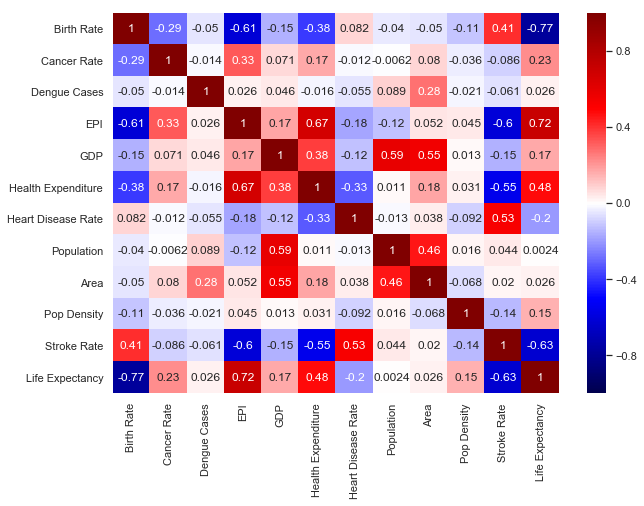

In [8]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

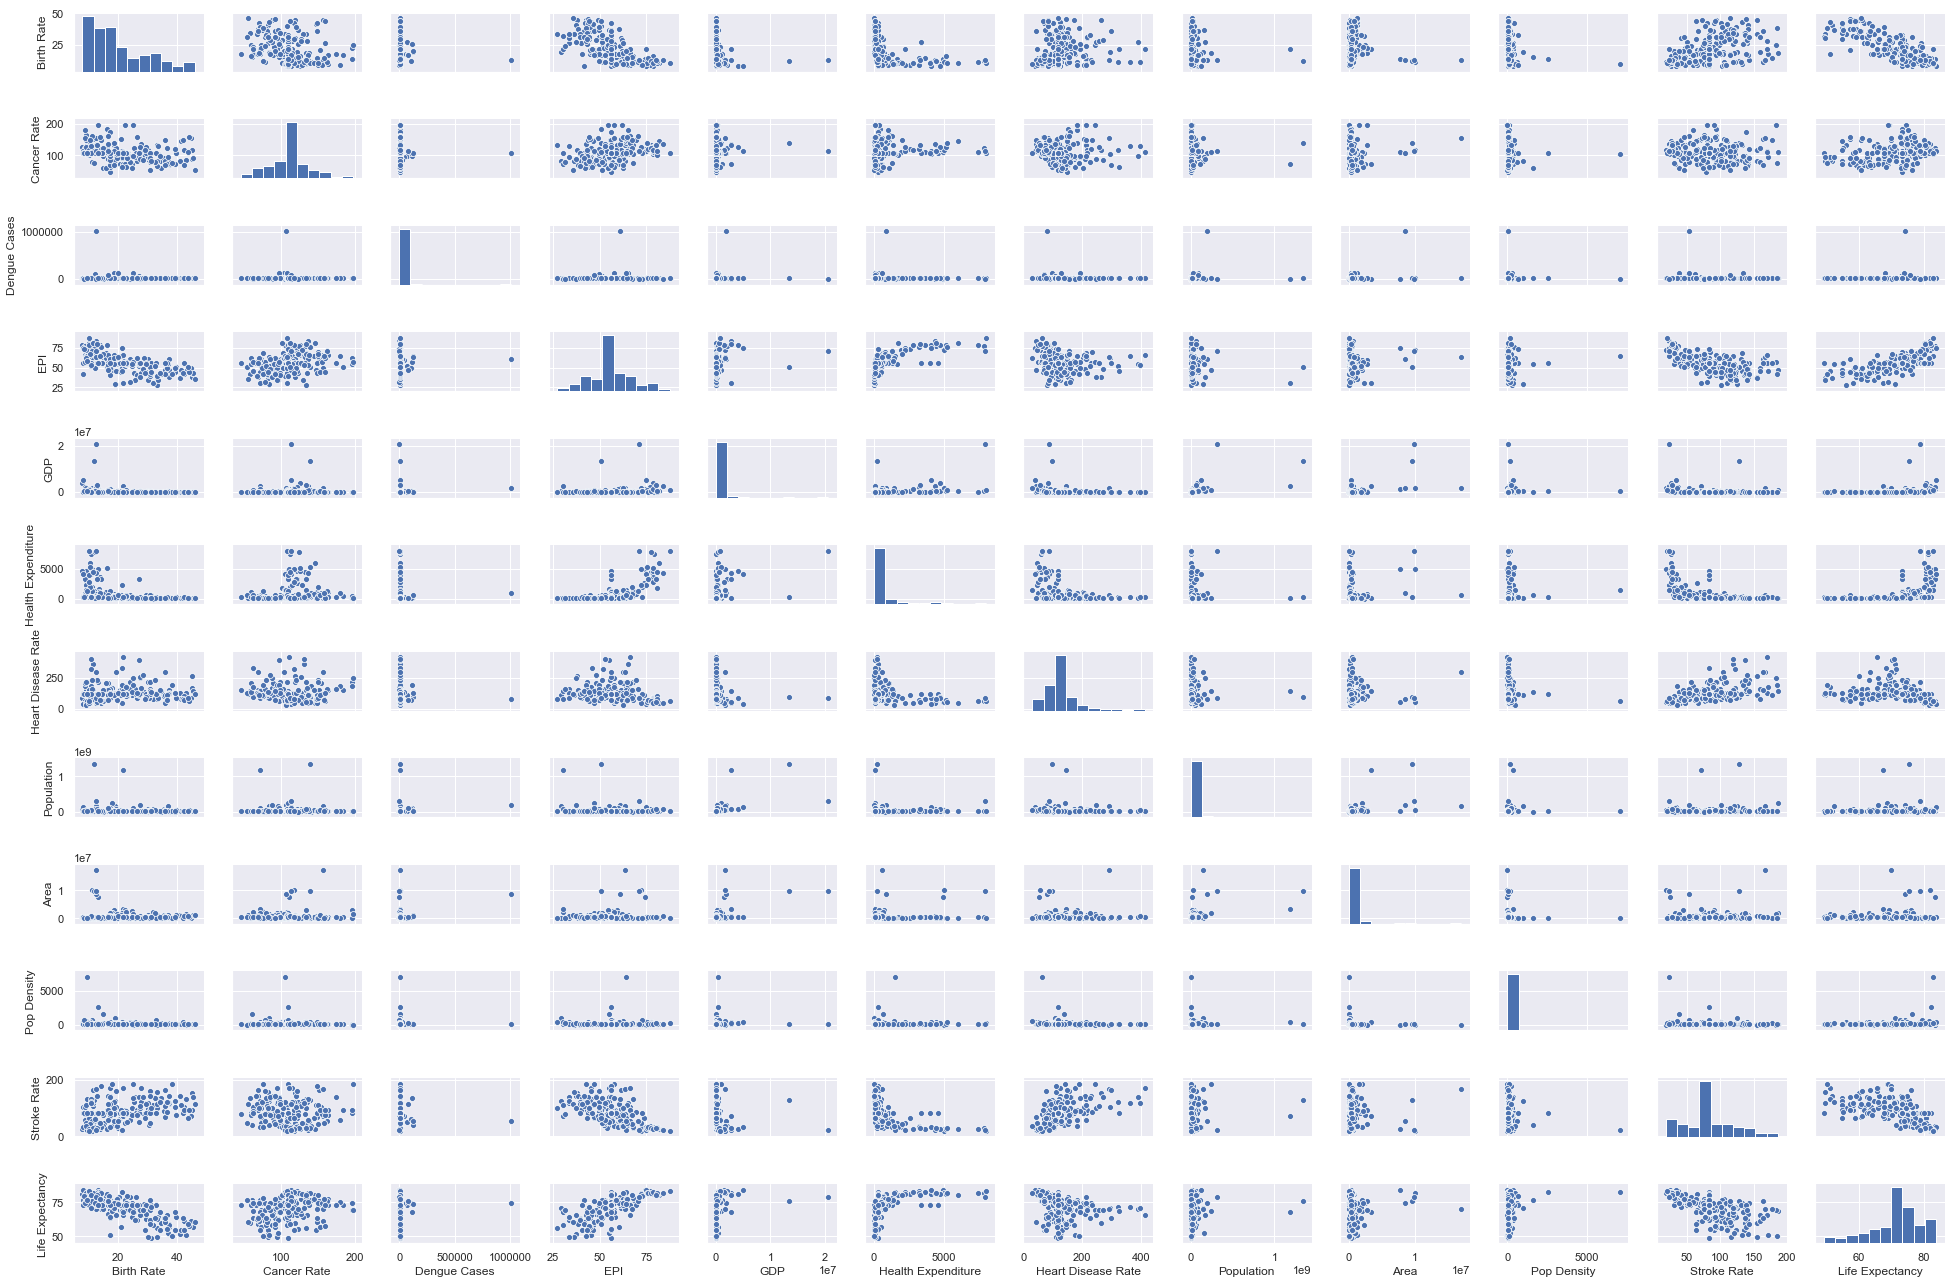

In [9]:
# Plot all of the variable-to-variable relations as scatterplots
# Note: there are outliers, and data points are concentrated on the left side (ie, right skewed)
sns.pairplot(df, height=1.5, aspect=1.5)

## 3. Feature Selection
### (i) Drop feature one by one
Drop feature one by one to see its effect on R^2 

R^2 will be lower when a significant feature has been dropped

In [11]:
## use "Ctrl-/" to include or remove each commenting
X = df[ [
#     'Birth Rate', 
    'Cancer Rate', 
    'Dengue Cases', 
    'EPI', 
    'GDP', 
    'Health Expenditure',
    'Heart Disease Rate', 
    'Population', 
    'Area', 
    'Pop Density', 
    'Stroke Rate'
                ] ].astype(float)
X = sm.add_constant(X)
y = df[ "Life Expectancy" ].astype(float)    # y is a series

model = sm.OLS(y, X)
results = model.fit()
results.summary()

# original, all features included, R^2 = 0.749
# without Birth Rate, R^2 = 0.597 (=> significant feature)
# without Cancer Rate, R^2 = 0.748
# without Dengue Cases, R^2 = 0.748
# without EPI, R^2 = 0.724 (=> significant feature)
# without GDP, R^2 = 0.749
# without Health Expenditure, R^2 =0.747
# without Heart Disease Rate, R^2 = 0.748
# without Population, R^2 = 0.748
# without Area, R^2 = 0.749
# without Pop Density, R^2 = 0.746
# without Stroke Rate, R^2 = 0.711 (=> significant feature)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     35.15
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.81e-41
Time:                        14:41:53   Log-Likelihood:                -746.27
No. Observations:                 248   AIC:                             1515.
Df Residuals:                     237   BIC:                             1553.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 53.5109      2.962     18.068      0.000      47.677      59.345
Cancer Rate            0.0093      0.013      0.705      0.482      -0.017       0.035
Dengue Cases        -8.15e-07   5.21e-06     -0.156      0.876   -1.11e-05    9.45e-06
EPI                    0.3946      0.047      8.352      0.000       0.302       0.488
GDP                 3.661e-08   2.93e-07      0.125      0.901    -5.4e-07    6.13e-07
Health Expenditure    -0.0004      0.000     -1.199      0.232      -0.001       0.000
Heart Disease Rate     0.0096      0.007      1.471      0.143      -0.003       0.023
Population          6.186e-09   3.63e-09      1.702      0.090   -9.72e-10    1.33e-08
Area               -1.238e-07   2.46e-07     -0.503      0.616   -6.09e-07    3.61e-07
Pop Density            0.0014      0.001      2.072      0.039    6.71e-05       0.003
Stroke Rate           -0.0764      0.013     -5.740      0.000      -0.103      -0.050
==============================================================================
Omnibus:                       48.324   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.809
Skew:                          -0.950   Prob(JB):                     4.73e-23
Kurtosis:                       5.518   Cond. No.                     1.13e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (ii) Remove outliers
To remove 7 outlier values in 6 countries. 

Note that I did not remove the data row altogether, I replace each outlier value by the next highest value.

Outliers: Dengue Cases (Brazil), GDP (USA,China), Population (China,India), Area (Russia), Pop Density (Singapore)

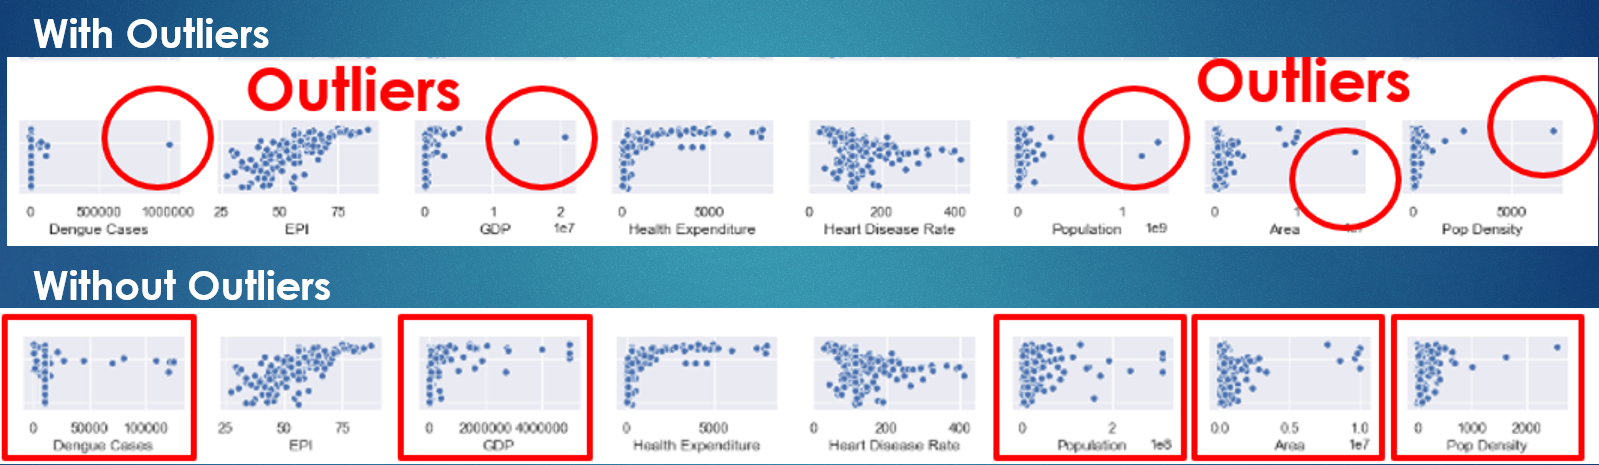

In [10]:
# RUN THIS CELL ONLY ONCE, to replace each outlier value with the next highest value
# Do it in 2 steps: first replace max-value by null, then replace null by the new max-value

df['Dengue Cases'].replace(df['Dengue Cases'].max(), np.nan, inplace=True)   # Brazil
df['Dengue Cases'].replace(np.nan, df['Dengue Cases'].max(), inplace=True)

df['GDP'].replace(df['GDP'].max(), np.nan, inplace=True)   # USA
df['GDP'].replace(df['GDP'].max(), np.nan, inplace=True)   # China
df['GDP'].replace(np.nan, df['GDP'].max(), inplace=True)

df['Population'].replace(df['Population'].max(), np.nan, inplace=True)   # China
df['Population'].replace(df['Population'].max(), np.nan, inplace=True)   # India
df['Population'].replace(np.nan, df['Population'].max(), inplace=True)

df['Area'].replace(df['Area'].max(), np.nan, inplace=True)   # Russia
df['Area'].replace(np.nan, df['Area'].max(), inplace=True)

df['Pop Density'].replace(df['Pop Density'].max(), np.nan, inplace=True)   # Singapore
df['Pop Density'].replace(np.nan, df['Pop Density'].max(), inplace=True)

In [11]:
# check results after removing outliers (R^2 = 0.737)
# Pop Density becomes significant feature (P-value becomes < 0.05)
X, y = df.drop(columns=['Life Expectancy', 'Country'], axis=1), df['Life Expectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     64.55
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           8.66e-65
Time:                        19:26:32   Log-Likelihood:                -686.88
No. Observations:                 248   AIC:                             1398.
Df Residuals:                     236   BIC:                             1440.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 73.9309      2.951     25.054      0.000      68.118      79.744
Birth Rate            -0.3948      0.033    -11.871      0.000      -0.460      -0.329
Cancer Rate           -0.0067      0.010     -0.644      0.520      -0.027       0.014
Dengue Cases       -3.227e-06   1.58e-05     -0.204      0.838   -3.44e-05    2.79e-05
EPI                    0.1941      0.042      4.640      0.000       0.112       0.277
GDP                 9.129e-08    6.5e-07      0.140      0.888   -1.19e-06    1.37e-06
Health Expenditure    -0.0003      0.000     -1.018      0.310      -0.001       0.000
Heart Disease Rate     0.0044      0.005      0.851      0.396      -0.006       0.015
Population          1.215e-09   1.01e-08      0.120      0.905   -1.87e-08    2.12e-08
Area                3.144e-08   2.35e-07      0.134      0.894   -4.31e-07    4.94e-07
Pop Density            0.0022      0.001      2.196      0.029       0.000       0.004
Stroke Rate           -0.0618      0.011     -5.859      0.000      -0.083      -0.041
==============================================================================
Omnibus:                       43.219   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.802
Skew:                          -0.826   Prob(JB):                     3.51e-22
Kurtosis:                       5.614   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

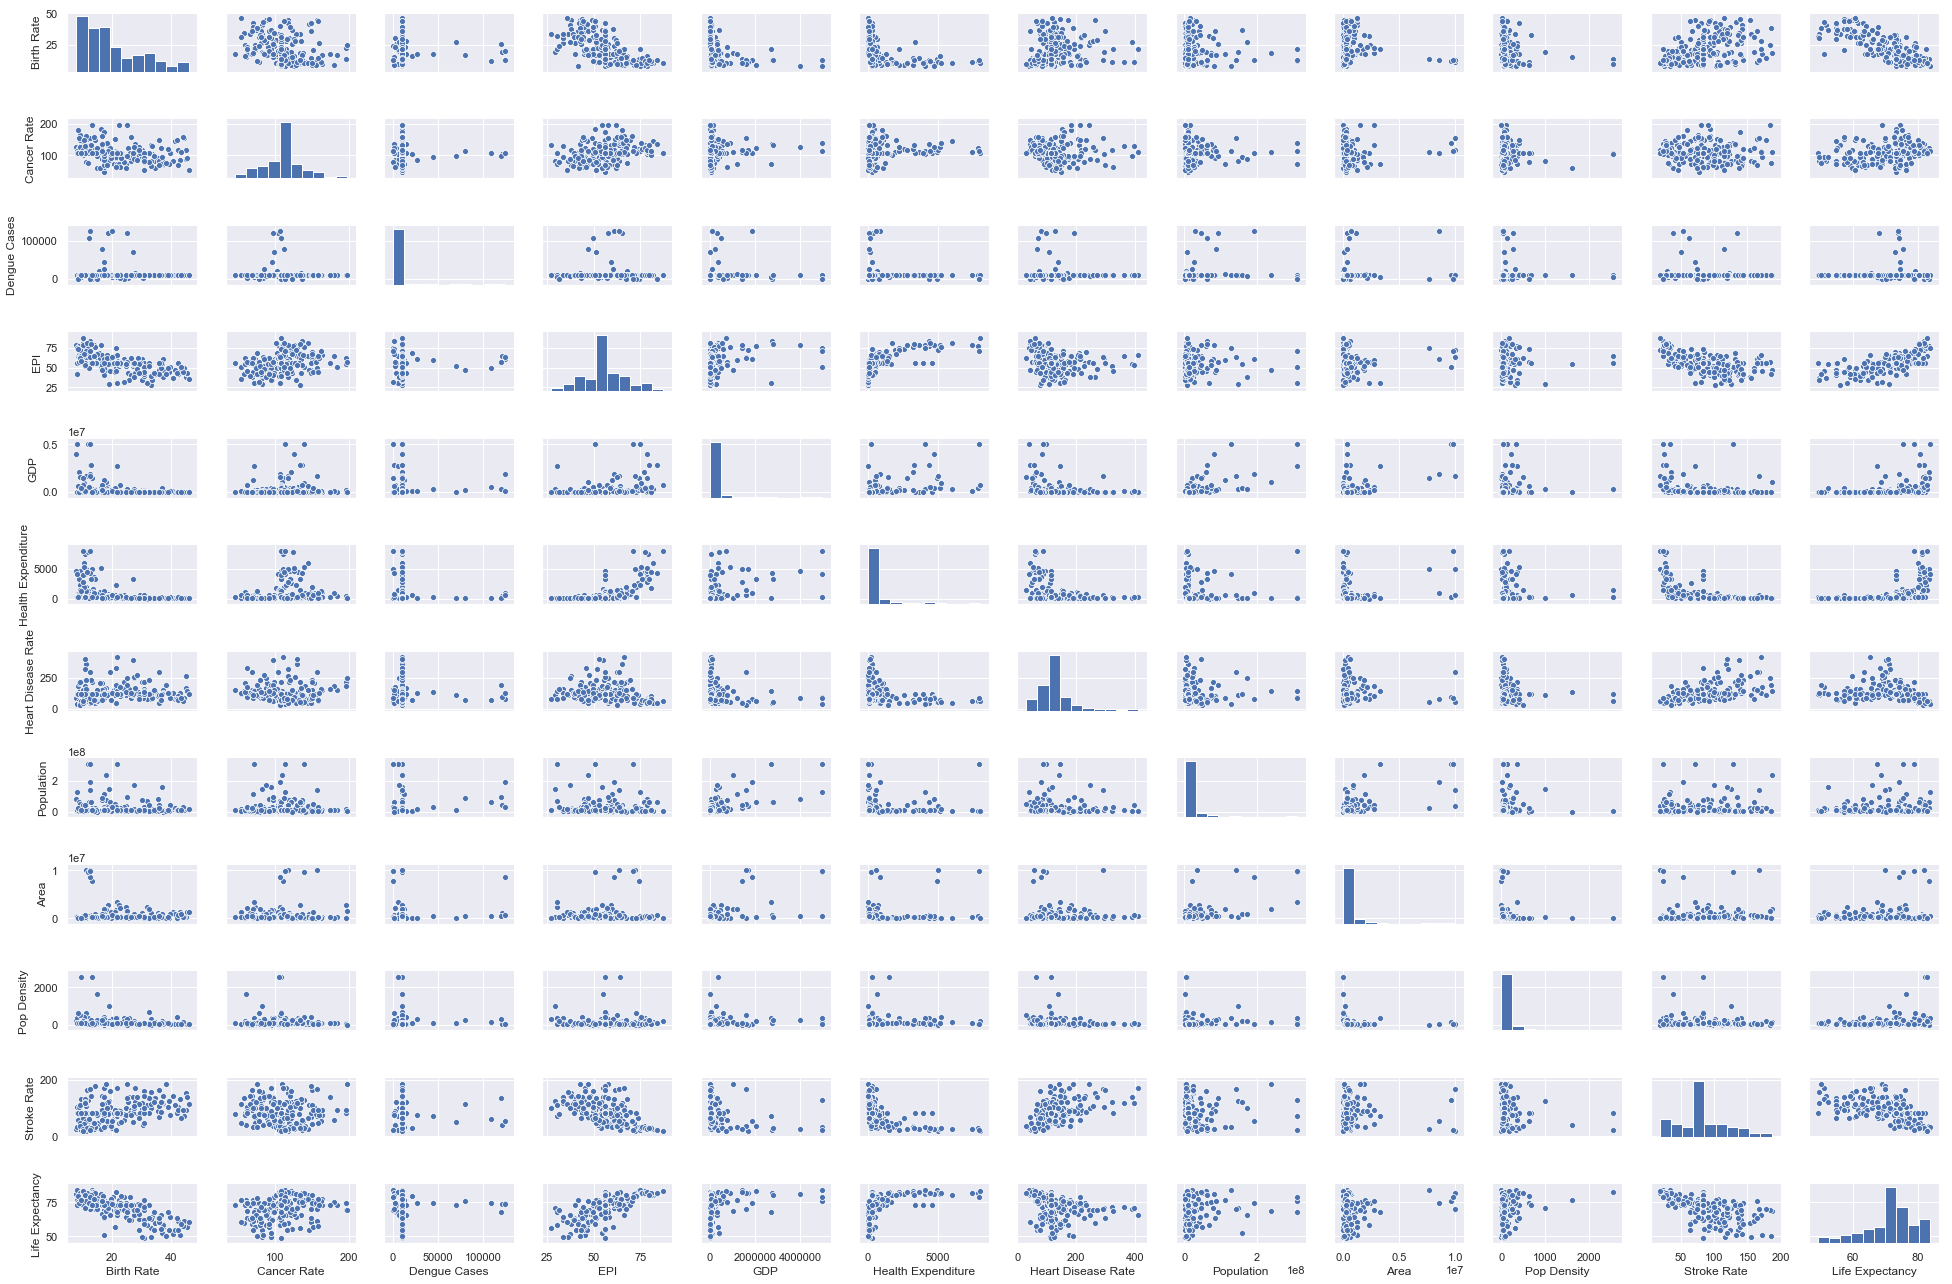

In [12]:
# Visualise pair plot after removing outliers
sns.pairplot(df, height=1.5, aspect=1.5)

### (iii) Apply LOG function

In [13]:
# Apply LOG function to all 11 features
df = pd.read_csv('df3.csv')

df['Birth Rate']         = np.log( df['Birth Rate'] )
df['Cancer Rate']        = np.log( df['Cancer Rate'] )
df['Dengue Cases']       = np.log( df['Dengue Cases'] )
df['EPI']                = np.log( df['EPI'] )
df['GDP']                = np.log( df['GDP'] )     # becomes a significant feature
df['Health Expenditure'] = np.log( df['Health Expenditure'] )
df['Heart Disease Rate'] = np.log( df['Heart Disease Rate'] )     # becomes a significant feature
df['Population']         = np.log( df['Population'] )     # becomes a significant feature
df['Area']               = np.log( df['Area'] )     # becomes a significant feature
df['Pop Density']        = np.log( df['Pop Density'] )
df['Stroke Rate']        = np.log( df['Stroke Rate'] )

In [14]:
# check results after applying LOG (R^2 = 0.740)
X, y = df.drop(columns=['Life Expectancy', 'Country'], axis=1), df['Life Expectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.07
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.06e-62
Time:                        19:27:16   Log-Likelihood:                -692.00
No. Observations:                 248   AIC:                             1408.
Df Residuals:                     236   BIC:                             1450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 63.5418     12.514      5.078      0.000      38.889      88.194
Birth Rate            -6.0946      0.865     -7.047      0.000      -7.798      -4.391
Cancer Rate           -0.5356      1.190     -0.450      0.653      -2.880       1.809
Dengue Cases          -0.0227      0.332     -0.068      0.946      -0.678       0.632
EPI                    8.4088      2.397      3.508      0.001       3.686      13.132
GDP                    0.5265      0.238      2.210      0.028       0.057       0.996
Health Expenditure     0.0737      0.411      0.179      0.858      -0.736       0.883
Heart Disease Rate     1.9988      0.838      2.384      0.018       0.347       3.650
Population            -6.0641      1.512     -4.011      0.000      -9.043      -3.086
Area                   5.9132      1.355      4.364      0.000       3.244       8.583
Pop Density            6.5949      1.370      4.815      0.000       3.896       9.293
Stroke Rate           -5.1904      0.978     -5.307      0.000      -7.117      -3.263
==============================================================================
Omnibus:                       49.561   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.450
Skew:                          -0.940   Prob(JB):                     1.40e-25
Kurtosis:                       5.746   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# # apply SQ ROOT to Health Expenditure   ## but results no good

# df = pd.read_csv('df3.csv')
# X = df[ ['Birth Rate', 'Cancer Rate', 'Dengue Cases', 'EPI', 'GDP', 'Health Expenditure',
#          'Heart Disease Rate', 'Population', 'Area', 'Pop Density', 'Stroke Rate'] ].astype(float)
# X = sm.add_constant(X)
# y = df.loc[:,"Life Expectancy"].astype(float)

# X['Health Expenditure'] = np.sqrt( X['Health Expenditure'] )

# model = LinearRegression()
# model = sm.OLS(y, X)
# results = model.fit()
# results.summary()

In [ ]:
# # drop Population, Area, Dengue, apply LOG to ALL features   ## but results no good

# df = pd.read_csv('df3.csv')
# X = df[ ['Birth Rate', 'Cancer Rate', 'EPI', 'GDP', 'Health Expenditure',
#          'Heart Disease Rate', 'Pop Density', 'Stroke Rate'] ].astype(float)
# y = df.loc[:,"Life Expectancy"].astype(float)

# X = np.log(X)
# X = sm.add_constant(X)

# model = LinearRegression()
# model = sm.OLS(y, X)
# results = model.fit()
# results.summary()

### Visualise pair plot for all features
Note: outliers have been removed using the LOG function alone

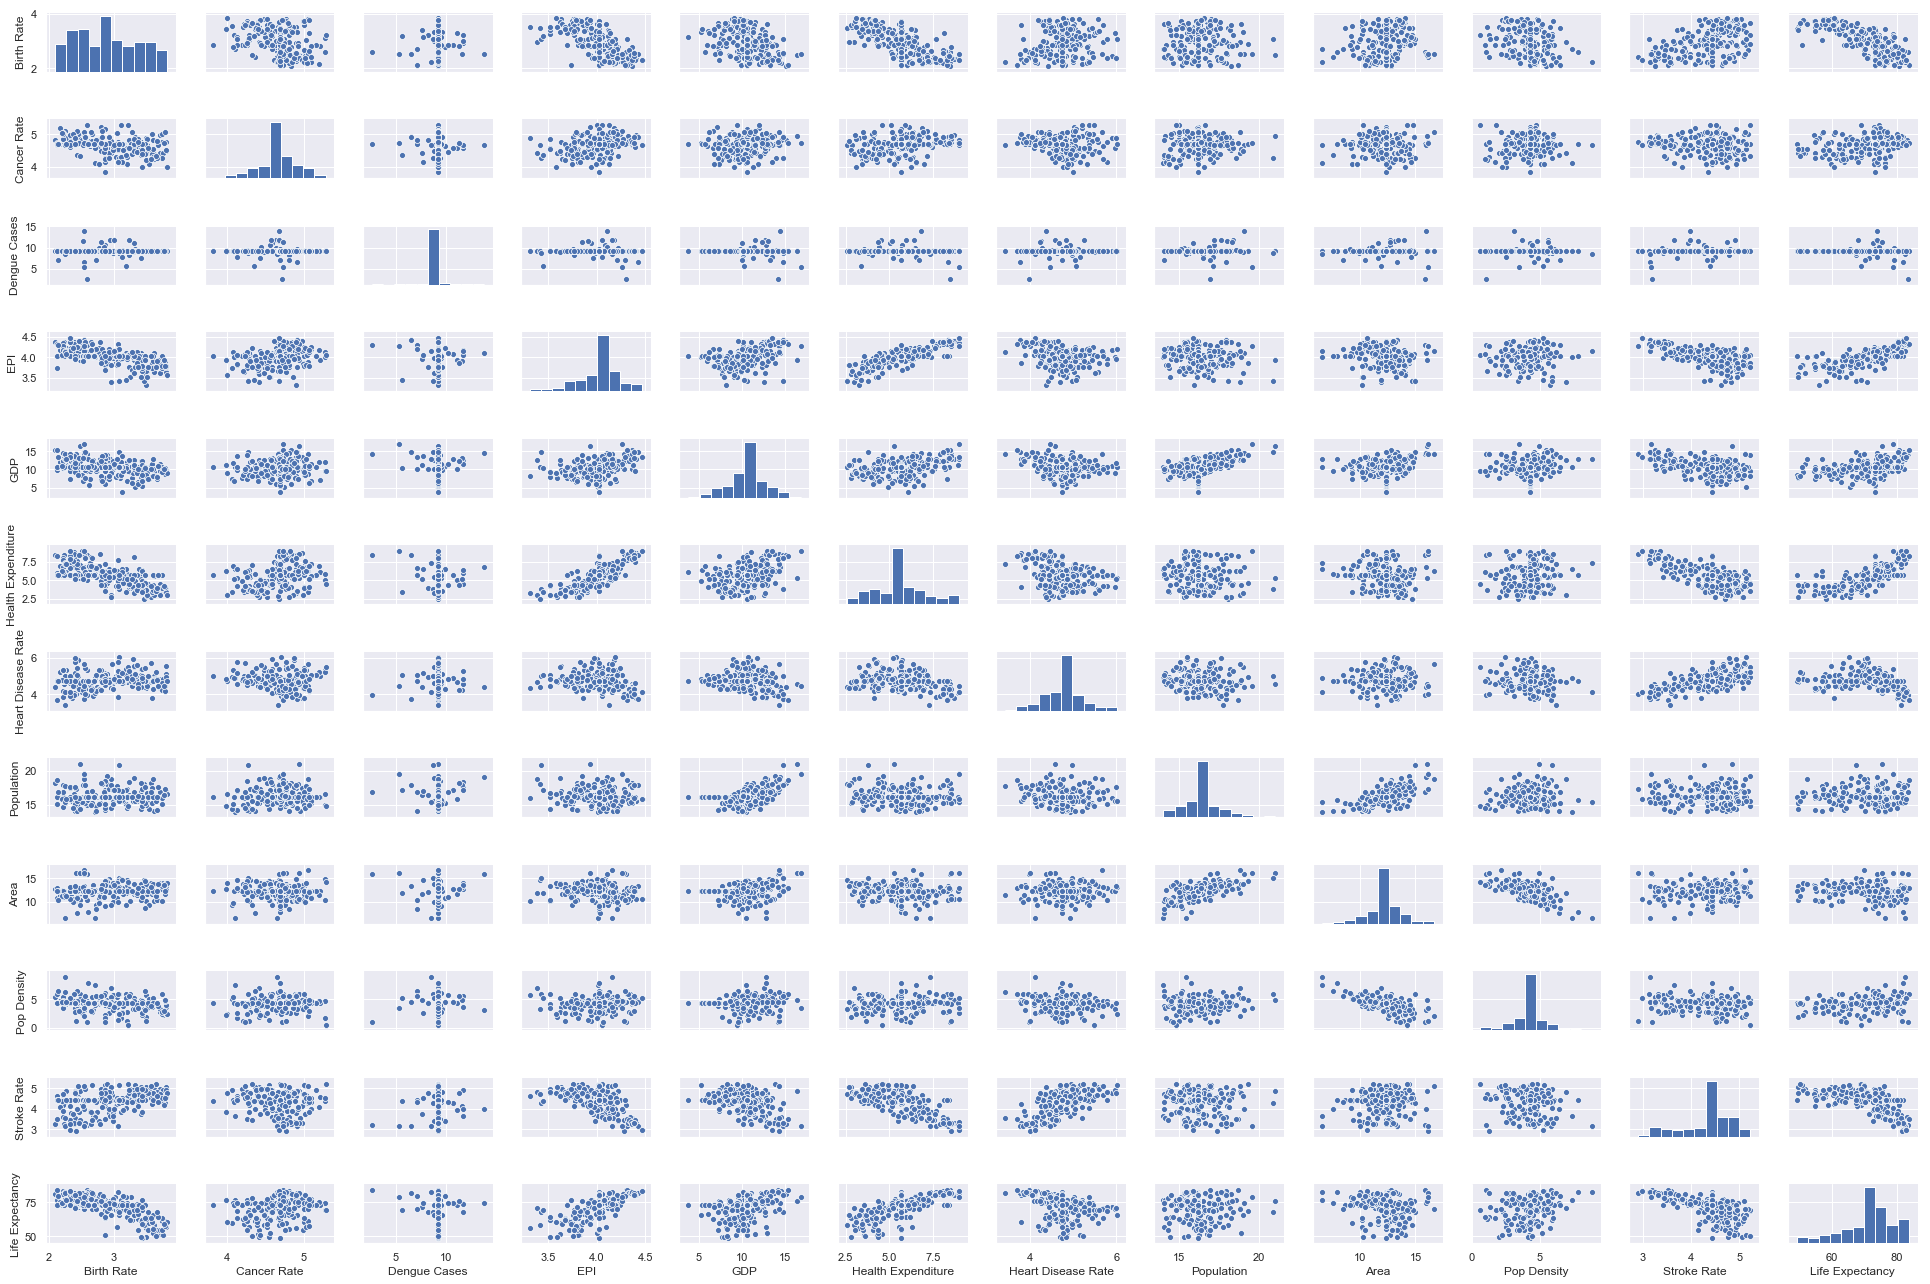

In [16]:
# Pair Plot with all 11 features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df, height=1.5, aspect=1.5)

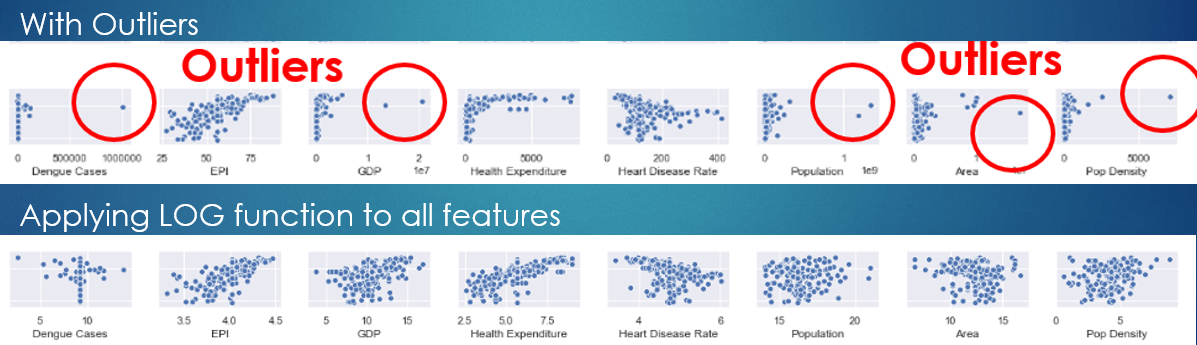

## 4. Model Selection
### (a) Regression with Statsmodels

In [281]:
# Ordinary Least Squares Regression with Statsmodels, Option 1 (similar to R coding)

df = pd.read_csv('df3.csv')
df.drop('Country', axis=1, inplace=True)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11', 'Y']

#1a Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11', data=df, return_type="dataframe")

#1b Create your model
model = sm.OLS(y, X)
#2 Fit your model to your training set
result = model.fit()
#3 Print summary statistics of the model's performance
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     63.88
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.16e-64
Time:                        02:11:16   Log-Likelihood:                -687.85
No. Observations:                 248   AIC:                             1400.
Df Residuals:                     236   BIC:                             1442.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.3305      2.924     25.420      0.000      68.570      80.091
X1            -0.3982      0.033    -11.918      0.000      -0.464      -0.332
X2            -0.0077      0.011     -0.734      0.464      -0.028       0.013
X3         -2.955e-06   4.13e-06     -0.715      0.475   -1.11e-05    5.18e-06
X4             0.1953      0.041      4.767      0.000       0.115       0.276
X5          2.622e-08   2.32e-07      0.113      0.910    -4.3e-07    4.83e-07
X6            -0.0003      0.000     -1.022      0.308      -0.001       0.000
X7             0.0042      0.005      0.809      0.419      -0.006       0.014
X8          1.904e-09    2.9e-09      0.657      0.512   -3.81e-09    7.62e-09
X9         -1.736e-08   1.95e-07     -0.089      0.929   -4.02e-07    3.67e-07
X10            0.0008      0.001      1.426      0.155      -0.000       0.002
X11           -0.0627      0.011     -5.914      0.000      -0.084      -0.042
==============================================================================
Omnibus:                       42.723   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.050
Skew:                          -0.819   Prob(JB):                     8.43e-22
Kurtosis:                       5.590   Cond. No.                     1.40e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [214]:
# Ordinary Least Squares Regression with Statsmodels, Option 2 (python method), same results as Option 1

df = pd.read_csv('df3.csv')
df.drop('Country', axis=1, inplace=True)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11', 'Y']
# df.head()

#1 Define the model
model = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11', data=df)
#2 Fit the model
result = model.fit()
#3 Print summary statistics of the model's performance
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     63.88
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.16e-64
Time:                        00:41:06   Log-Likelihood:                -687.85
No. Observations:                 248   AIC:                             1400.
Df Residuals:                     236   BIC:                             1442.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.3305      2.924     25.420      0.000      68.570      80.091
X1            -0.3982      0.033    -11.918      0.000      -0.464      -0.332
X2            -0.0077      0.011     -0.734      0.464      -0.028       0.013
X3         -2.955e-06   4.13e-06     -0.715      0.475   -1.11e-05    5.18e-06
X4             0.1953      0.041      4.767      0.000       0.115       0.276
X5          2.622e-08   2.32e-07      0.113      0.910    -4.3e-07    4.83e-07
X6            -0.0003      0.000     -1.022      0.308      -0.001       0.000
X7             0.0042      0.005      0.809      0.419      -0.006       0.014
X8          1.904e-09    2.9e-09      0.657      0.512   -3.81e-09    7.62e-09
X9         -1.736e-08   1.95e-07     -0.089      0.929   -4.02e-07    3.67e-07
X10            0.0008      0.001      1.426      0.155      -0.000       0.002
X11           -0.0627      0.011     -5.914      0.000      -0.084      -0.042
==============================================================================
Omnibus:                       42.723   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.050
Skew:                          -0.819   Prob(JB):                     8.43e-22
Kurtosis:                       5.590   Cond. No.                     1.40e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (b) Regression using SkLearn

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [5]:
# # Ordinary Least Squares Regression with sklearn

df = pd.read_csv('df3.csv')
df.drop('Country', axis=1, inplace=True)
df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11', 'Y']
# df.head()

model = LinearRegression()
X = df[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8','X9', 'X10', 'X11'] ]
y = df[ ['Y'] ]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(model.score(X, y))
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

0.7485911614905574
[74.33048837]
[[-3.98227951e-01 -7.71569047e-03 -2.95463179e-06  1.95335033e-01
   2.62174070e-08 -2.71378662e-04  4.21654043e-03  1.90382795e-09
  -1.73570105e-08  7.50438137e-04 -6.26857101e-02]]


In [124]:
# hold out 20% of the data for validation, to find optimal alpha
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

# Mean Absolute Error (MAE) for validation
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

(198, 12)
(198,)
(50, 12)
(50,)


In [125]:
## Use lassoCV to find the optimal ALPHA value for L1 regularization
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scaled, y_train)
# This is the best alpha value found
lasso_model.alpha_ 
# 0.2582618760682675 without LOG function
# 0.0032550885998350564 after applying LOG function to all features

0.11226677735108136

In [126]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, lasso_model.coef_))

[('const', 0.0),
 ('Birth Rate', -3.8916006508426135),
 ('Cancer Rate', 0.0),
 ('Dengue Cases', -0.0),
 ('EPI', 1.4273188288583987),
 ('GDP', 0.18726586034118298),
 ('Health Expenditure', -0.0),
 ('Heart Disease Rate', 0.2048384529390812),
 ('Population', -0.0),
 ('Area', -0.0),
 ('Pop Density', 0.42348380016716186),
 ('Stroke Rate', -2.313005172540813)]

In [70]:
# Make predictions on the validation set using the new model, and find the MAE
mae(y_val, lasso_model.predict(X_val_scaled))

3.242286281849861

In [127]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, lasso_model.predict(X_val_scaled))
# 0.6778582657678913 without LOG function
# 0.7013586553900932 after applying LOG function to all features

0.6867181874636392

In [72]:
## Note: lars_path takes numpy matrices, not pandas dataframes
from sklearn.linear_model import lars_path
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_train_scaled, y_train.values, method='lasso')

Computing regularization path using the LARS ...


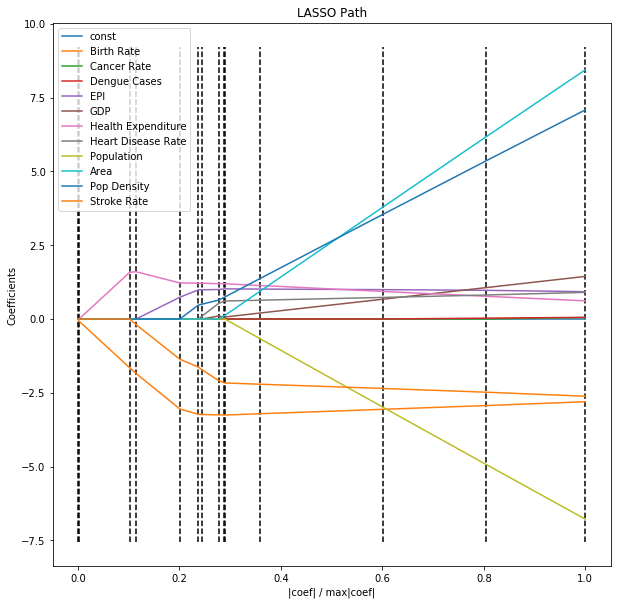

In [73]:
# plotting the LARS path
import matplotlib as plt
import matplotlib.pyplot as plt

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [113]:
## Use RidgeCV to find the optimal ALPHA value for L2 regularization
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled, y_train)
# This is the best alpha value found
ridge_model.alpha_
# 25.23539170434766 without LOG function
# 0.2097046401323233 after applying LOG function to all features

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.29673024081888694

In [75]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('const', 0.0),
 ('Birth Rate', -2.866477944330204),
 ('Cancer Rate', 0.03237756370221641),
 ('Dengue Cases', 0.05075232437476613),
 ('EPI', 0.9432091909998856),
 ('GDP', 1.253787557752905),
 ('Health Expenditure', 0.7009134905825851),
 ('Heart Disease Rate', 0.8721988685273913),
 ('Population', -5.829073502663299),
 ('Area', 7.271811704363029),
 ('Pop Density', 6.193383783622025),
 ('Stroke Rate', -2.558865170578739)]

In [76]:
# Make predictions on the validation set using the new model, and find the MAE
mae(y_val, ridge_model.predict(X_val_scaled))

3.2462538772163185

In [90]:
np.mean(np.abs(ridge_model.predict(X_val_scaled) - y_val)) 

3.2462538772163185

In [77]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, ridge_model.predict(X_val_scaled))
# 0.6815718599477412 without LOG function
# 0.7001803890388709 after applying LOG function to all features

0.7001803890388709

In [115]:
## Use ElasticNetCV to find the optimal ALPHA value
# Scale the data as before
std = StandardScaler()
std.fit(X_train.values)
# Scale the Predictors on both the train and validation set
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
elasticnet_model = ElasticNetCV(alphas = alphavec, cv=5)
elasticnet_model.fit(X_train_scaled, y_train)
# This is the best alpha value it found
elasticnet_model.alpha_
# 0.1956398343517063 without LOG function
# 0.0016257556664437934 after applying LOG function to all features

0.0021461411978584036

In [79]:
# display all coefficients in the model with optimal alpha
list(zip(X_train.columns, ridge_model.coef_))

[('const', 0.0),
 ('Birth Rate', -2.866477944330204),
 ('Cancer Rate', 0.03237756370221641),
 ('Dengue Cases', 0.05075232437476613),
 ('EPI', 0.9432091909998856),
 ('GDP', 1.253787557752905),
 ('Health Expenditure', 0.7009134905825851),
 ('Heart Disease Rate', 0.8721988685273913),
 ('Population', -5.829073502663299),
 ('Area', 7.271811704363029),
 ('Pop Density', 6.193383783622025),
 ('Stroke Rate', -2.558865170578739)]

In [80]:
# Make predictions on the validation set using the new model, and find the MAE
mae(y_val, elasticnet_model.predict(X_val_scaled))

3.2453979504265384

In [81]:
# Make predictions on the validation set using the new model, and find the R^2
r2_score(y_val, elasticnet_model.predict(X_val_scaled))
# 0.681292482381891 without LOG function
# 0.7004421000497352 after applying LOG function to all features

0.7004421000497352

In [ ]:
# Summary
# Linear R^2: 0.740
# Ridge R^2: 0.7001803890388709
# Lasso R^2: 0.7013586553900932
# ElasticNet R^2: 0.7004421000497352

# Conclusion: Select simple linear regression model

In [118]:
## FINAL set of 8 features (Drop 3x features that are insignificant)
## use LOG function on all 8 features, outliers have been removed using the LOG function alone)
df = pd.read_csv('df3.csv')
X = df[ ['Birth Rate', 'EPI', 'GDP', 'Heart Disease Rate', 'Population', 'Area', 'Pop Density', 'Stroke Rate'] ].astype(float)
X = np.log(X)
y = df[ "Life Expectancy" ].astype(float)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     84.93
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.66e-65
Time:                        18:49:10   Log-Likelihood:                -692.12
No. Observations:                 248   AIC:                             1402.
Df Residuals:                     239   BIC:                             1434.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.0778     11.902      5.216      0.000      38.631      85.524
Birth Rate            -6.0636      0.790     -7.674      0.000      -7.620      -4.507
EPI                    8.3512      1.978      4.223      0.000       4.455      12.247
GDP                    0.5484      0.231      2.371      0.019       0.093       1.004
Heart Disease Rate     2.0611      0.822      2.507      0.013       0.442       3.680
Population            -6.2222      1.453     -4.283      0.000      -9.084      -3.360
Area                   6.0375      1.310      4.610      0.000       3.458       8.617
Pop Density            6.7105      1.331      5.041      0.000       4.088       9.333
Stroke Rate           -5.3415      0.876     -6.095      0.000      -7.068      -3.615
==============================================================================
Omnibus:                       49.024   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.676
Skew:                          -0.932   Prob(JB):                     3.41e-25
Kurtosis:                       5.726   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
## to check R^2 score for all models with best alpha, using manual split (see below for R^2 using CV, more robust)
# hold out 20% of the data for validation 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(198, 9)
(198,)
(50, 9)
(50,)


In [99]:
#set up the 5 models for training & validation:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression val R^2: {lm.score(X_val, y_val):.3f}')

#Feature scaling for train/val data so that we can run our ridge/lasso/elasticnet model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

lm_ridge = Ridge(alpha=0.2097046401323233)
lm_ridge.fit(X_train_scaled, y_train)
print(f'Ridge regression val R^2: {lm_ridge.score(X_val_scaled, y_val):.3f}')

lm_lasso = Lasso(alpha=0.0032550885998350564)
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso regression val R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

lm_elasticnet = ElasticNet(alpha=0.0016257556664437934)
lm_elasticnet.fit(X_train_scaled, y_train)
print(f'ElasticNet regression val R^2: {lm_elasticnet.score(X_val_scaled, y_val):.3f}')

#Feature transforms for train/val data so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

# Linear regression val R^2: 0.713
# Ridge regression val R^2: 0.712
# Lasso regression val R^2: 0.713
# ElasticNet regression val R^2: 0.712
# Degree 2 polynomial regression val R^2: 0.663

Linear regression val R^2: 0.713
Ridge regression val R^2: 0.712
Lasso regression val R^2: 0.713
ElasticNet regression val R^2: 0.712
Degree 2 polynomial regression val R^2: 0.663


In [121]:
## cross validation using KFold (on the 100% dataset, without manually splitting)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Feature transform/scaling so that we can run our ridge/lasso/elasticnet model 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
#Feature transform/scaling so that we can run our poly model 
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X.values)

kf = KFold(n_splits=5, shuffle=True, random_state = 1)

cvs_lm = cross_val_score(lm, X, y, cv=kf, scoring='r2')
print(cvs_lm)
print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3) )

cvs_ridge = cross_val_score(lm_ridge, X_scaled, y, cv=kf, scoring='r2')
print(cvs_ridge)
print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3) )

cvs_lasso = cross_val_score(lm_lasso, X_scaled, y, cv=kf, scoring='r2')
print(cvs_lasso)
print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

cvs_elasticnet = cross_val_score(lm_elasticnet, X_scaled, y, cv=kf, scoring='r2')
print(cvs_elasticnet)
print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3) )

cvs_poly = cross_val_score(lm_poly, X_poly, y, cv=kf, scoring='r2')
print(cvs_poly)
print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

# [0.63234622 0.72018406 0.59833499 0.77907137 0.78894173]
# Linear regression cv R^2: 0.704 +- 0.077
# [0.63054232 0.71808071 0.59325086 0.79001517 0.78518253]
# Ridge regression cv R^2: 0.703 +- 0.08
# [0.63160325 0.71952203 0.59659505 0.78254776 0.78747905]
# Lasso regression cv R^2: 0.704 +- 0.078
# [0.63118087 0.71887851 0.5950665  0.78651041 0.78648458]
# ElasticNet regression cv R^2: 0.704 +- 0.079
# [0.67260843 0.56723061 0.64473045 0.37774726 0.81111133]
# Degree 2 polynomial Regression cv R^2: 0.615 +- 0.142

[0.71262294 0.75563625 0.66732885 0.68730441 0.6974013 ]
Linear regression cv R^2: 0.704 +- 0.03
[0.71242685 0.75587293 0.67225579 0.68812456 0.69437769]
Ridge regression cv R^2: 0.705 +- 0.029
[0.71269591 0.75593543 0.66935667 0.68766309 0.6957877 ]
Lasso regression cv R^2: 0.704 +- 0.029
[0.71250054 0.75590424 0.67169626 0.68804772 0.69464311]
ElasticNet regression cv R^2: 0.705 +- 0.029
[0.43078165 0.53864455 0.71824054 0.60521879 0.39185648]
Degree 2 polynomial Regression cv R^2: 0.537 +- 0.118


In [63]:
## try KFold = 10, results are WORSE!

# kf = KFold(n_splits=10, shuffle=True, random_state = 71)

# cvs_lm = cross_val_score(lm, X, y, cv=kf, scoring='r2')
# print(cvs_lm)
# print('Linear regression cv R^2:', round(np.mean(cvs_lm),3), '+-', round(np.std(cvs_lm),3) )

# cvs_ridge = cross_val_score(lm_ridge, X_scaled, y, cv=kf, scoring='r2')
# print(cvs_ridge)
# print('Ridge regression cv R^2:', round(np.mean(cvs_ridge),3), '+-', round(np.std(cvs_ridge),3) )

# cvs_lasso = cross_val_score(lm_lasso, X_scaled, y, cv=kf, scoring='r2')
# print(cvs_lasso)
# print('Lasso regression cv R^2:', round(np.mean(cvs_lasso),3), '+-', round(np.std(cvs_lasso),3) )

# cvs_elasticnet = cross_val_score(lm_elasticnet, X_scaled, y, cv=kf, scoring='r2')
# print(cvs_elasticnet)
# print('ElasticNet regression cv R^2:', round(np.mean(cvs_elasticnet),3), '+-', round(np.std(cvs_elasticnet),3) )

# cvs_poly = cross_val_score(lm_poly, X_poly, y, cv=kf, scoring='r2')
# print(cvs_poly)
# print('Degree 2 polynomial Regression cv R^2:', round(np.mean(cvs_poly),3), '+-', round(np.std(cvs_poly),3) )

In [122]:
## Evaluation on test dataset
# note: insufficient data, so test all models on global dataset X, y
X_test = X.copy()
y_test = y.copy()

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear regression test R^2: {lm.score(X_test, y_test):.3f}')

#Feature scaling for test data so that we can run our ridge/lasso/elasticnet model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

lm_ridge = Ridge(alpha=0.2097046401323233)
lm_ridge.fit(X_train_scaled, y_train)
print(f'Ridge regression test R^2: {lm_ridge.score(X_test_scaled, y_test):.3f}')

lm_lasso = Lasso(alpha=0.0032550885998350564)
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

lm_elasticnet = ElasticNet(alpha=0.0016257556664437934)
lm_elasticnet.fit(X_train_scaled, y_train)
print(f'ElasticNet regression test R^2: {lm_elasticnet.score(X_test_scaled, y_test):.3f}')

#Feature transforms for test data so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')


cvs_lm = cross_val_score(lm, X_test, y_test, cv=kf, scoring='r2')
print(("Linear Regression test R^2:"),( cvs_lm))
print(("Linear Regression test mean R^:"), round(np.mean(cvs_lm),3), "+-", round(np.std(cvs_lm),3) )
cvs_ridge = cross_val_score(lm_ridge, X_test_scaled, y_test, cv=kf, scoring='r2')
print(('Ridge Regression test R^2:'), cvs_ridge)
print( ("Ridge Regression test mean R^:"), round(np.mean(cvs_ridge),3), "+-", round(np.std(cvs_ridge),3) )
cvs_lasso = cross_val_score(lm_lasso, X_test_scaled, y_test, cv=kf, scoring='r2')
print(('Lasso Regression test R^2:'),cvs_lasso)
print( ("Lasso Regression test mean R^:"), round(np.mean(cvs_lasso),3), "+-", round(np.std(cvs_lasso),3) )
cvs_poly = cross_val_score(lm_poly, X_test_poly, y_test, cv=kf, scoring='r2')
print(('Degree 2 polynomial regression test R^2:'),cvs_poly)
print( ('Degree 2 polynomial regression test mean R^2:'), round(np.mean(cvs_poly),3), "+-", round(np.std(cvs_poly),3) )


# Linear regression test R^2: 0.736
# Ridge regression test R^2: 0.712
# Lasso regression test R^2: 0.713
# ElasticNet regression test R^2: 0.712
# Degree 2 polynomial regression test R^2: 0.802

Linear regression test R^2: 0.736
Ridge regression test R^2: 0.736
Lasso regression test R^2: 0.736
ElasticNet regression test R^2: 0.736
Degree 2 polynomial regression test R^2: 0.802
Linear Regression test R^2: [0.71262294 0.75563625 0.66732885 0.68730441 0.6974013 ]
Linear Regression test mean R^: 0.704 +- 0.03
Ridge Regression test R^2: [0.71235983 0.75584582 0.67255192 0.68815711 0.69417513]
Ridge Regression test mean R^: 0.705 +- 0.029
Lasso Regression test R^2: [0.71268331 0.75593138 0.66943674 0.68767956 0.69573018]
Lasso Regression test mean R^: 0.704 +- 0.029
Degree 2 polynomial regression test R^2: [0.43078165 0.53864455 0.71824054 0.60521879 0.39185648]
Degree 2 polynomial regression test mean R^2: 0.537 +- 0.118


In [120]:
# why Degree 2 polynomial regression test R^2: 0.802 ?
print(X_train.shape)
print(X_test.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_poly.shape)
print(X_test_poly.shape)

(198, 9)
(248, 9)
(198, 9)
(248, 9)
(198, 55)
(248, 55)


## Conclusion
Linear Regression is the chosen model.

Drop 3x features that are insignificant, and apply LOG function to ALL 8 features (LOG function can already take care of outliers)

R^2 = 0.740, and all 8 feaatures have P-value < 0.05

In [3]:
df = pd.read_csv('df3.csv')
df.drop(columns=['Dengue Cases', 'Cancer Rate', 'Health Expenditure'], axis=1, inplace=True)
df['Birth Rate']         = np.log( df['Birth Rate'] )
df['EPI']                = np.log( df['EPI'] )
df['GDP']                = np.log( df['GDP'] )
df['Heart Disease Rate'] = np.log( df['Heart Disease Rate'] )
df['Population']         = np.log( df['Population'] )
df['Area']               = np.log( df['Area'] )
df['Pop Density']        = np.log( df['Pop Density'] )
df['Stroke Rate']        = np.log( df['Stroke Rate'] )

In [5]:
X, y = df.drop(columns=['Life Expectancy', 'Country'], axis=1), df['Life Expectancy']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     84.93
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.66e-65
Time:                        20:04:24   Log-Likelihood:                -692.12
No. Observations:                 248   AIC:                             1402.
Df Residuals:                     239   BIC:                             1434.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.0778     11.902      5.216      0.000      38.631      85.524
Birth Rate            -6.0636      0.790     -7.674      0.000      -7.620      -4.507
EPI                    8.3512      1.978      4.223      0.000       4.455      12.247
GDP                    0.5484      0.231      2.371      0.019       0.093       1.004
Heart Disease Rate     2.0611      0.822      2.507      0.013       0.442       3.680
Population            -6.2222      1.453     -4.283      0.000      -9.084      -3.360
Area                   6.0375      1.310      4.610      0.000       3.458       8.617
Pop Density            6.7105      1.331      5.041      0.000       4.088       9.333
Stroke Rate           -5.3415      0.876     -6.095      0.000      -7.068      -3.615
==============================================================================
Omnibus:                       49.024   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.676
Skew:                          -0.932   Prob(JB):                     3.41e-25
Kurtosis:                       5.726   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model interpretation
Unaffected by the features, your life expectancy is 62 years. 

If your country has low birth rate, add 6 more years to your life. 

If the EPI (Environment Performance Index) is high, add 8 more years to your life. 

If you live in a rich country, add half a year to your life. 

Finally for every unit (or rather LOG unit) decrease in stroke rate, 5 more years could be added to your life.

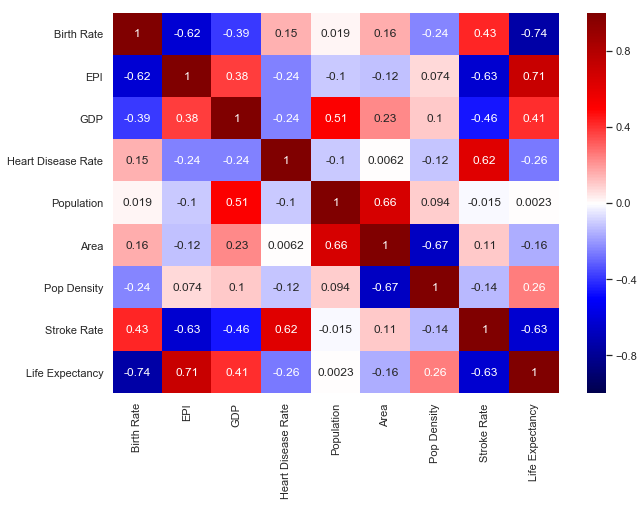

In [6]:
# Visualizing correlation with Seaborn, only FINAL 8 significant features
# Note feature correlation < 0.7
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

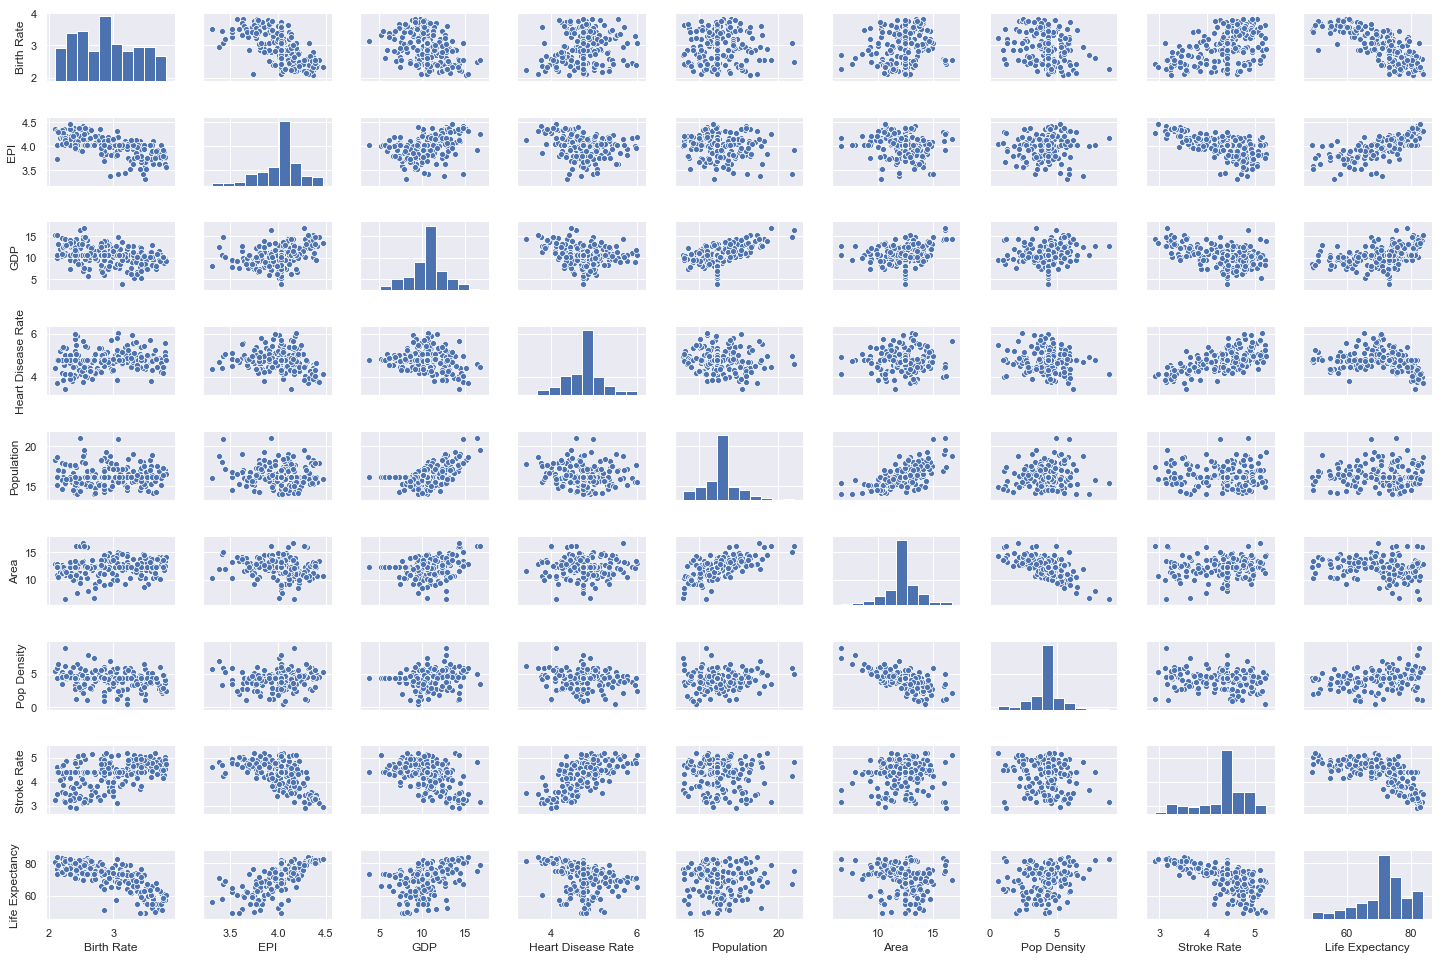

In [7]:
# Pair Plot with FINAL 8 significant features
# Note: outliers have been removed using the LOG function alone
sns.pairplot(df, height=1.5, aspect=1.5)

Text(0, 0.5, 'residuals')

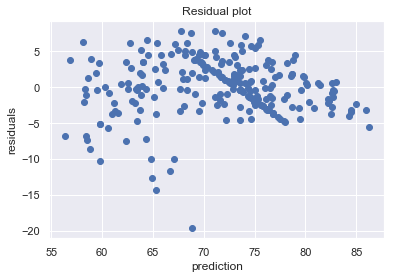

In [8]:
# Plot the residuals 
plt.figure(figsize=(6,4))
plt.scatter(results.predict(), results.resid)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

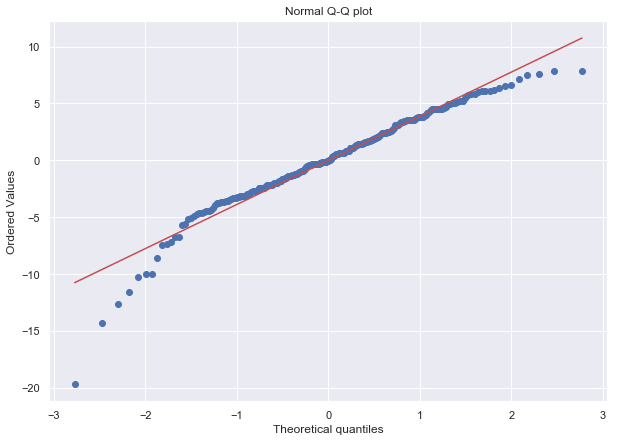

<Figure size 576x576 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [42]:
# Normal Q-Q Plot
import scipy.stats as stats

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot your predicted values on the x-axis, and your residuals on the y-axis
df['predict'] = fit.predict(X)
df['resid'] = y - df.predict
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(8,8))
plt.show()
plt.savefig("diagnostics.svg")

## Additional study
Instead of replacing null fields with median, try removing null data rows completely

note: this reduces data set to only 136 rows, some P-values > 0.05 (bad), but R^2 result is 0.846 (best)!

In [32]:
## try database without null fields (remove entire row), and remove Dengue column (too few data)
df = pd.read_csv('df2.csv')   # df with distinct countries, but with null fields
df = df.drop(columns=['Dengue Cases'], axis=1)
df = df.dropna(how = 'any') 

X, y = df.drop(columns=['Life Expectancy', 'Country'], axis=1), df['Life Expectancy']
X = np.log(X)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     63.01
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           5.54e-44
Time:                        19:48:39   Log-Likelihood:                -368.44
No. Observations:                 136   AIC:                             758.9
Df Residuals:                     125   BIC:                             790.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                101.5193     15.766      6.439      0.000      70.316     132.722
Birth Rate            -9.3633      1.241     -7.545      0.000     -11.819      -6.907
Cancer Rate           -2.1194      1.404     -1.510      0.134      -4.897       0.659
EPI                    8.6343      2.744      3.147      0.002       3.203      14.065
GDP                    1.3877      0.773      1.794      0.075      -0.143       2.918
Health Expenditure    -1.5575      0.795     -1.959      0.052      -3.131       0.016
Heart Disease Rate     1.3456      0.892      1.508      0.134      -0.421       3.112
Population          -303.9537    189.366     -1.605      0.111    -678.732      70.825
Area                 302.9787    189.521      1.599      0.112     -72.106     678.064
Pop Density          303.0415    189.513      1.599      0.112     -72.028     678.111
Stroke Rate           -5.9904      1.182     -5.069      0.000      -8.329      -3.652
==============================================================================
Omnibus:                        4.635   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.239
Skew:                          -0.425   Prob(JB):                        0.120
Kurtosis:                       3.161   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'residuals')

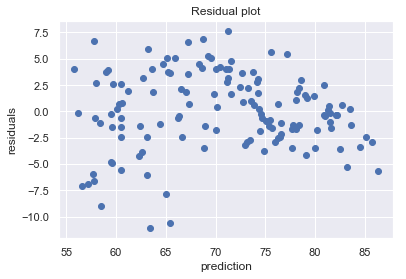

In [33]:
# Plot the residuals (without null fields, only 136 rows of data)
plt.figure(figsize=(6,4))
plt.scatter(results.predict(), results.resid)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

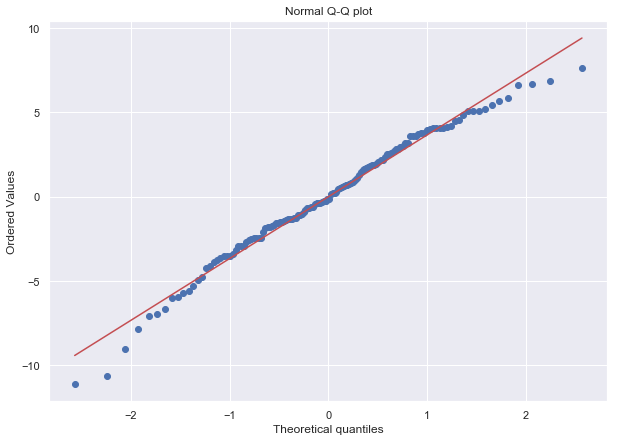

<Figure size 576x576 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [37]:
# Normal Q-Q Plot
import scipy.stats as stats

# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y) # for later use
# Plot your predicted values on the x-axis, and your residuals on the y-axis
df['predict'] = fit.predict(X)
df['resid'] = y - df.predict
# diagnose/inspect residual normality using qqplot:
stats.probplot(df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.figure(figsize=(8,8))
plt.show()
plt.savefig("diagnostics.svg")

In [ ]:
## end ##